# ZINB Distribution

In [397]:
library(pscl)
library(lmtest)
library(ggplot2)

## Generate Simulated SNV and Genes

In [506]:
SNV.simulated <- function(sample.size, zero.rate, gene.mu, is.snv=TRUE){
    if(is.snv){
        # Gene
        zero.size <- ceiling(sample.size * zero.rate)
        nonzero.size <- sample.size - zero.size
        gene.zero <- rep(0, zero.size)
        gene.nonzero <- rpois(nonzero.size, gene.mu)
    
        #SNV
        snv.zero <- rep(0,zero.size)
        error.rate <- 1/gene.nonzero
        error <- (runif(nonzero.size) < error.rate)
        snv.nonzero <- as.integer(!error)
        snv <- c(snv.zero, snv.nonzero)
    }
    else{
        snv <- rep(0,sample.size)
    }   
    return(snv)
}

In [511]:
gene.simulated <- function(sample.size,zero.rate, gene.mu){
    zero.size <- ceiling(sample.size * zero.rate)
    nonzero.size <- sample.size - zero.size
    gene.zero <- rep(0, zero.size)
    gene.nonzero <- rpois(nonzero.size, gene.mu)
    gene <- c(gene.zero,gene.nonzero)
    return(gene)
}

In [537]:
sample.size.1 <- 50
sample.size.2 <- 50
zero.rate <- 0.9
snv.1 <- sample(SNV.simulated(sample.size.1,zero.rate,gene.mu = 10))
snv.2 <- sample(SNV.simulated(sample.size.2,zero.rate,gene.mu = 10,is.snv = FALSE))
gene.1 <- sample(gene.simulated(sample.size.1,zero.rate,gene.mu = 10))
gene.2 <- sample(gene.simulated(sample.size.2,zero.rate,gene.mu = 20))
snv <- c(snv.1,snv.2)
gene <- c(gene.1,gene.2)
df <- data.frame(gene,snv)

In [538]:
zinb.model <- zeroinfl(formula = gene ~ snv, data = df, dist = "negbin")
m0 <- zeroinfl(formula = gene ~ 1|snv , data = df, dist = "negbin")
waldtest(m0,zinb.model)

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,96,NA,NA,NA
2,95,1,0.9931879,0.3189645


In [392]:
test.del = read.table('./one_gene_one_snv.csv',header = TRUE,sep = ',',row.names = 1)

In [407]:
test.del$snv = factor(test.del$snv)

In [408]:
test.del

,gene,snv
,<int>,<fct>
SRR2431428,154,1
SRR2431433,14,1
SRR2431427,6,1
SRR2431374,14,1
SRR2431386,0,1
SRR2431424,0,0
SRR2431391,39,1
SRR2431369,0,0
SRR2431436,362,1


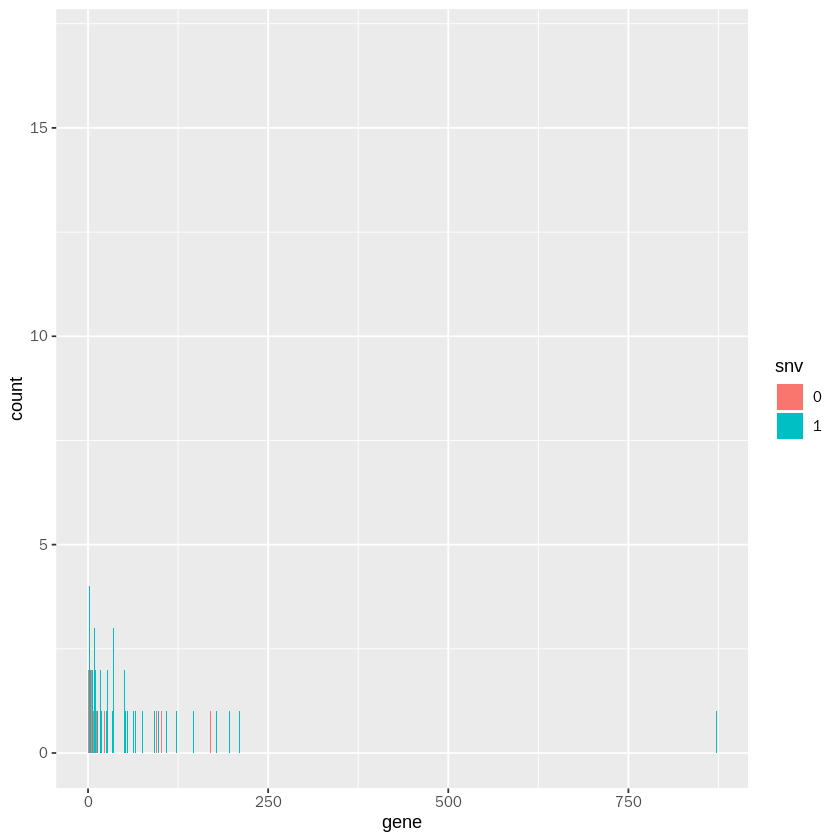

In [501]:
ggplot(data = test.del) + geom_bar(aes(x=gene,fill=snv),position = 'dodge')

In [505]:
zinb.model <- zeroinfl(formula = gene ~ snv, data = test.del, dist = "negbin")
m0 <- zeroinfl(formula = gene ~ 1|snv , data = test.del, dist = "negbin")
waldtest(m0,zinb.model)

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,117,NA,NA,NA
2,116,1,0.1400784,0.7082031


In [417]:
summary(zinb.model)


Call:
zeroinfl(formula = gene ~ snv, data = test.del, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.5442 -0.5087 -0.4328 -0.1106  9.7889 

Count model coefficients (negbin with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.6637     0.3907   9.378   <2e-16 ***
snv1          0.1634     0.4365   0.374    0.708    
Log(theta)   -1.2103     0.1367  -8.855   <2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -1.2337     0.7067  -1.746   0.0809 .
snv1         -9.1480    50.7124  -0.180   0.8568  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Theta = 0.2981 
Number of iterations in BFGS optimization: 51 
Log-likelihood: -491.3 on 5 Df

In [415]:
waldtest(m0,zinb.model)

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,117,NA,NA,NA
2,116,1,0.1400784,0.7082031


In [356]:
as.integer(!(1 / x  < 0.6))

[1] 1 1 0

In [ ]:
geneA.zero.p <- 0.8
geneB.zero.p <- 0.6
sample.size <- 100
geneA.zero <- 

In [502]:
set.seed(123)
zero.p.1 <- 0.5
nonzero.p.1 <- 1 - zero.p.1
sample.size.1 <- 30
sample.zero.size.1 <- ceiling(sample.size.1 * zero.p.1)
sample.nonzero.size.1 <- sample.size.1 - sample.zero.size.1
data.nonzero.1 <- rpois(sample.nonzero.size.1, lambda = 30)
data.zero.1 <-rep(0,sample.zero.size.1)
data.1 <- c(data.nonzero.1, data.zero.1)
f.1 <- rep(1,sample.size.1)

zero.p.2 <- 0.5
nonzero.p.2 <- 1 - zero.p.2
sample.size.2 <- 30
sample.zero.size.2 <- ceiling(sample.size.2 * zero.p.2)
sample.nonzero.size.2 <- sample.size.2 - sample.zero.size.2
data.nonzero.2 <- rpois(sample.nonzero.size.2, lambda = 100)
data.zero.2 <-rep(0,sample.zero.size.2)
data.2 <- c(data.nonzero.2, data.zero.2)
f.2 <- rep(0,sample.size.2)

data <- c(data.1, data.2)
f <- c(f.1, f.2)

In [503]:
df <- data.frame(data,f)

In [504]:
zinb.model <- zeroinfl(formula = data ~ f, data = df, dist = "negbin")
m0 <- zeroinfl(formula = data ~ 1|f , data = df, dist = "negbin")
waldtest(m0,zinb.model)

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,56,NA,NA,NA
2,55,1,469.4416,4.239136e-104


In [450]:
summary(m0)


Call:
zeroinfl(formula = data ~ 1 | f, data = df, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-2.1132 -0.3160 -0.3160  0.2692  5.1338 

Count model coefficients (negbin with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.28803    0.01426   160.5   <2e-16 ***
Log(theta)   9.31313    9.31375     1.0    0.317    

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.1973     0.1491  -14.74   <2e-16 ***
f             4.3943     0.2108   20.84   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Theta = 11082.5559 
Number of iterations in BFGS optimization: 24 
Log-likelihood: -1591 on 4 Df

In [452]:
log(0.9) - (4.3943*1-2.1973 )

[1] -2.302361

In [311]:
waldtest(m0,zinb.model)[2,'Pr(>Chisq)']

[1] 0.2009334

In [229]:
zinb.model


Call:
zeroinfl(formula = data ~ f, data = df, dist = "negbin")

Count model coefficients (negbin with log link):
(Intercept)            f  
     0.8398      -0.1520  
Theta = 38.561 

Zero-inflation model coefficients (binomial with logit link):
(Intercept)            f  
     0.4217       0.3754  


In [ ]:
df <- data.frame()

In [218]:
?waldtest

In [167]:
set.seed(5)
N <- 500
x1 <- rpois(N,2)
x2 <- rpois(N,3)
x3 <- c(x1,x2)
y1 <- rep(1,N)
y2 <- rep(3,N)
y3 <- c(y1,y2)
df <- data.frame(x3,y3)

In [168]:
poisson.model <- glm(x3 ~ y3, df, family = poisson(link = "log"))

In [198]:
zinb.model <- zeroinfl(formula = x3 ~ y3, data = df, dist = "negbin")


'log Lik.' 6.472545e-22 (df=5)

In [170]:
summary(zinb.model)


Call:
zeroinfl(formula = x3 ~ y3, data = df, dist = "negbin")

Pearson residuals:
     Min       1Q   Median       3Q      Max 
-1.72768 -0.70291 -0.01258  0.70578  2.84591 

Count model coefficients (negbin with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.48980    0.05817   8.420   <2e-16 ***
y3           0.20673    0.02345   8.817   <2e-16 ***
Log(theta)  10.54331   26.62345   0.396    0.692    

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -5.38287    7.16117  -0.752    0.452
y3          -0.03873    2.72354  -0.014    0.989
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Theta = 37922.7808 
Number of iterations in BFGS optimization: 46 
Log-likelihood: -1816 on 5 Df

In [171]:
m0 <- update(zinb.model, . ~ 1)

In [172]:
summary(m0)


Call:
zeroinfl(formula = x3 ~ 1, data = df, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.5284 -0.9195 -0.3106  0.9073  3.3431 

Count model coefficients (negbin with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.93408    0.02458  37.994  < 2e-16 ***
Log(theta)   4.16372    1.55689   2.674  0.00749 ** 

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.277      1.043    -4.1 4.12e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Theta = 64.3102 
Number of iterations in BFGS optimization: 19 
Log-likelihood: -1867 on 3 Df

In [173]:
pchisq(2 * (logLik(zinb.model) - logLik(m0)), df = 3, lower.tail=FALSE)

'log Lik.' 6.472545e-22 (df=5)

In [121]:
df.test <- data.frame(y3=c(1,3))

In [122]:
predict(poisson.model,df.test,type = "response")

1        2 
1.998674 4.995360